# ***Importing Libraraies***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
sns.set_theme(style="whitegrid")   #White background and Light gray grid lines
plt.rcParams['figure.figsize'] = (10, 5) #(width,height)


***Run Command Parameters***

In Matplotlib, rcParams is a dictionary that stores default settings for plots.

In [3]:
df = pd.read_parquet('/content/drive/MyDrive/guvi/traffic_stops_clean.parquet')

***Parquet***

Parquet is a column-based data file format used to store large datasets efficiently.

It is compressed and fast, especially when reading only specific columns.

Commonly used in data analysis, ML, and big data tools instead of CSV.

In [4]:
df.shape

(2067761, 48)

**2067761** rows and **48** columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067761 entries, 0 to 2067760
Data columns (total 48 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   SeqID                    object        
 1   Date Of Stop             datetime64[ns]
 2   Time Of Stop             object        
 3   Agency                   object        
 4   SubAgency                object        
 5   Description              object        
 6   Location                 object        
 7   Latitude                 float64       
 8   Longitude                float64       
 9   Accident                 bool          
 10  Belts                    bool          
 11  Personal Injury          bool          
 12  Property Damage          bool          
 13  Fatal                    bool          
 14  Commercial License       bool          
 15  HAZMAT                   bool          
 16  Commercial Vehicle       bool          
 17  Alcohol                  bo

In [6]:
df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Driver City,Driver State,DL State,Arrest Type,Stop Hour,District Number,VehicleType_Code,VehicleType_Category,Arrest_Type_Code,Arrest_Type_Desc
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,2023-05-01,23:11:00,MCP,"3rd district, silver spring",operating unregistered motor vehicle on highway,briggs chaney rd @ columiba pike,0.000000,0.00000,False,...,GAITHERSBURG,MD,MD,A - Marked Patrol,23,3,2,automobile,A,marked patrol
1,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,MCP,"6th district, gaithersburg / montgomery village",driving to drive motor vehicle on highway with...,oakmont ave @ grovemont cir,39.097965,-77.15301,False,...,GAITHERSBURG,MD,MD,A - Marked Patrol,16,6,2,automobile,A,marked patrol
2,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,MCP,"6th district, gaithersburg / montgomery village",failure to display registration card upon dema...,oakmont ave @ grovemont cir,39.097965,-77.15301,False,...,GAITHERSBURG,MD,MD,A - Marked Patrol,16,6,2,automobile,A,marked patrol
3,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,MCP,"6th district, gaithersburg / montgomery village",driver of motor vehicle following vehicle clos...,oakmont ave @ grovemont cir,39.097965,-77.15301,False,...,GAITHERSBURG,MD,MD,A - Marked Patrol,16,6,2,automobile,A,marked patrol
4,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,MCP,"6th district, gaithersburg / montgomery village",failure to control veh. speed on hwy. to avoid...,oakmont ave @ grovemont cir,39.097965,-77.15301,False,...,GAITHERSBURG,MD,MD,A - Marked Patrol,16,6,2,automobile,A,marked patrol


***A traffic stop*** is when police stop a vehicle on the road to check or take action for a possible issue.

In [7]:
bool_cols = {
    'Accident': 'Accident',
    'Personal Injury': 'Injury',
    'Fatal': 'Fatal',
    'Property Damage': 'Property Damage',
    'Alcohol': 'Alcohol Involved'
}


In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a 2x3 grid of donut charts
fig = make_subplots(
    rows=2,
    cols=3,
    subplot_titles=list(bool_cols.values()),  # Titles for each subplot
    specs=[[{'type': 'domain'}] * 3, [{'type': 'domain'}] * 3]  # Pie chart layout
)

# Starting position for subplots (Plotly uses 1-based indexing)
row, col = 1, 1

# Loop through each boolean column
for col_name, title in bool_cols.items():

    # Count True and False values
    counts = df[col_name].value_counts()

    # Add a donut chart for the column
    fig.add_trace(
        go.Pie(
            labels=['No', 'Yes'],  # False = No, True = Yes
            values=[
                counts.get(False, 0),  # Handle missing values safely
                counts.get(True, 0)
            ],
            hole=0.4  # Donut style
        ),
        row=row,
        col=col
    )

    # Move to the next column
    col += 1

    # If column exceeds limit, move to next row
    if col > 3:
        col = 1
        row += 1

# Update overall figure layout
fig.update_layout(
    title_text="Overview of Safety & Risk Indicators in Traffic Stops",
    height=700,
    showlegend=True
)

# Display the interactive figure
fig.show()


## ***insights***
***Accident***

Most traffic stops do not result in accidents, with ~97% showing no accident involvement.

***Personal Injury***

Injuries are rare, occurring in just about ~1–2% of cases.

***Fatal***

Fatal outcomes are extremely rare, effectively near zero in the dataset.

***Property Damage***

Property damage happensmore often than injury/fatality around ~2% of stops.

***Alcohol Involved***

Alcohol involvement is minimal, well below 1%, indicating low DUI presence in recorded stops.
However, highly critical

### **Alcohol vs Accident Relationship**

In [9]:
# Create a normalized cross-tabulation between Alcohol and Accident
# Each row sums to 1 (shows rates instead of raw counts)
alcohol_accident = pd.crosstab(
    df['Alcohol'],
    df['Accident'],
    normalize='index'
).reset_index()

# Convert wide-format table into long-format for Plotly
alcohol_accident = alcohol_accident.melt(
    id_vars='Alcohol',        # Keep Alcohol as identifier
    var_name='Accident',      # Column name for accident status
    value_name='Rate'         # Column name for normalized values
)

# Create a grouped bar chart
fig = px.bar(
    alcohol_accident,
    x='Alcohol',              # Alcohol involvement (True/False)
    y='Rate',                 # Accident rate
    color='Accident',         # Accident vs No Accident
    barmode='group',          # Side-by-side bars
    title='Accident Rate by Alcohol Involvement'
)

# Display the interactive plot
fig.show()


## ***Insight***

Accident rates are higher when alcohol is involved compared to non-alcohol-related traffic stops.

This highlights alcohol as a significant risk factor in traffic accidents.

## ***Most common Violations***

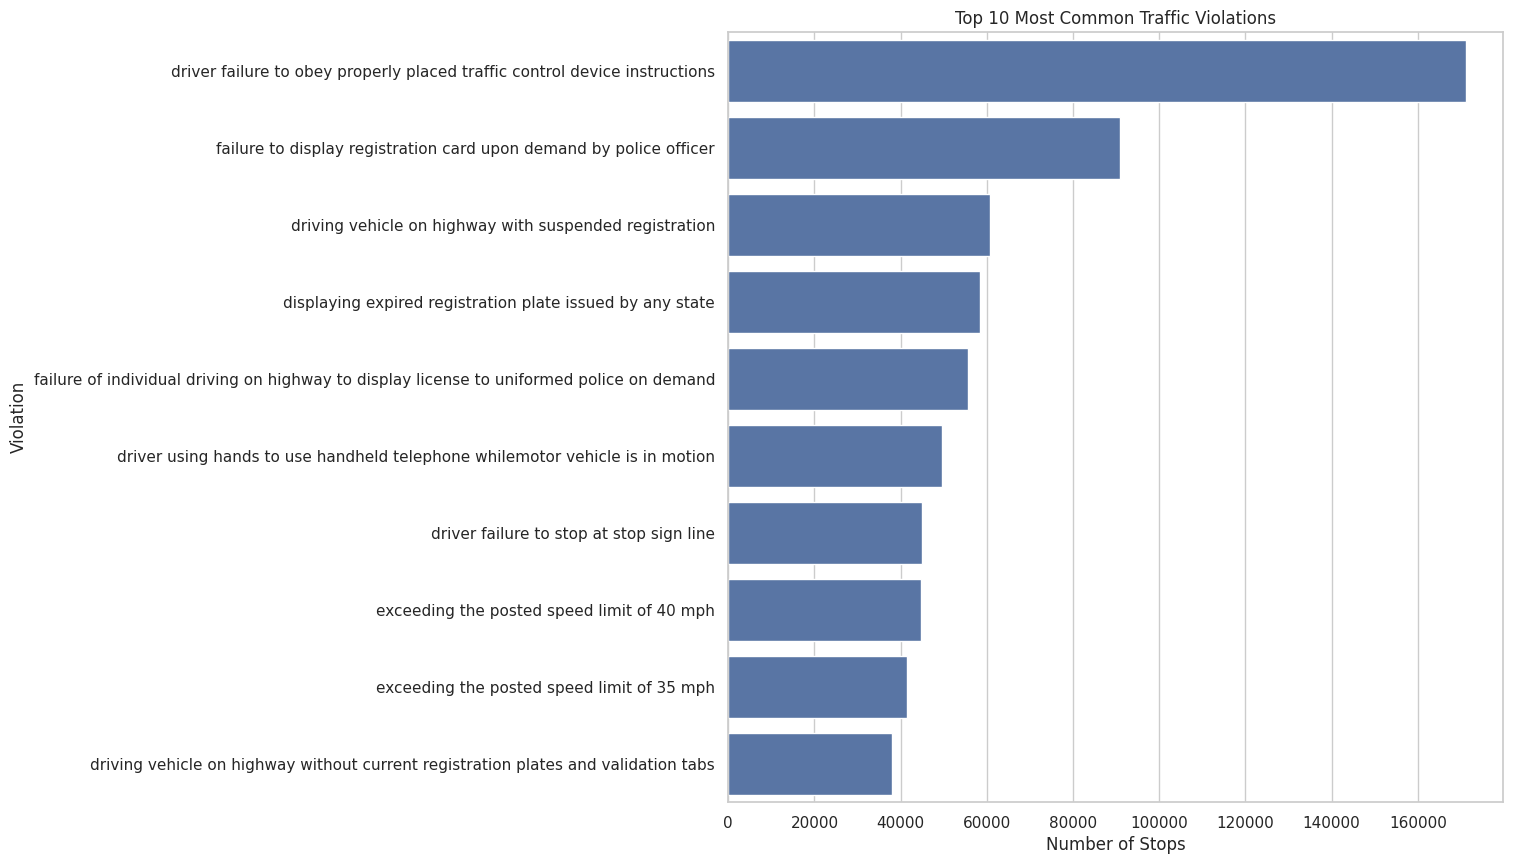

In [10]:
top_violations = df['Description'].value_counts().head(10)

plt.figure(figsize=(10,10))
sns.barplot(
    x=top_violations.values,
    y=top_violations.index
)
plt.title("Top 10 Most Common Traffic Violations")
plt.xlabel("Number of Stops")
plt.ylabel("Violation")
plt.show()


***insights***

The most common traffic violations are failure to obey traffic control devices and not displaying required registration documents.

Registration-related issues (suspended, expired, or missing plates) appear more frequently than speeding violations.

Driver behavior violations like mobile phone usage and failure to stop at stop signs remain significant contributors to traffic stops.

## ***Stops by Hour***

In [11]:
hour_counts = df['Stop Hour'].value_counts().sort_index()

fig = px.bar(
    x=hour_counts.index,
    y=hour_counts.values,
    labels={'x':'Hour of Day', 'y':'Number of Stops'},
    title='Traffic Stops by Hour'
)
fig.show()


***Insights***

Traffic stops are lowest in the early morning hours (around 3–5 AM).

Stops increase during daytime and peak in the late evening/night (around 9–11 PM).

This pattern suggests higher enforcement and traffic activity during commute and night-time hours.

### ***Stops by Weekday***

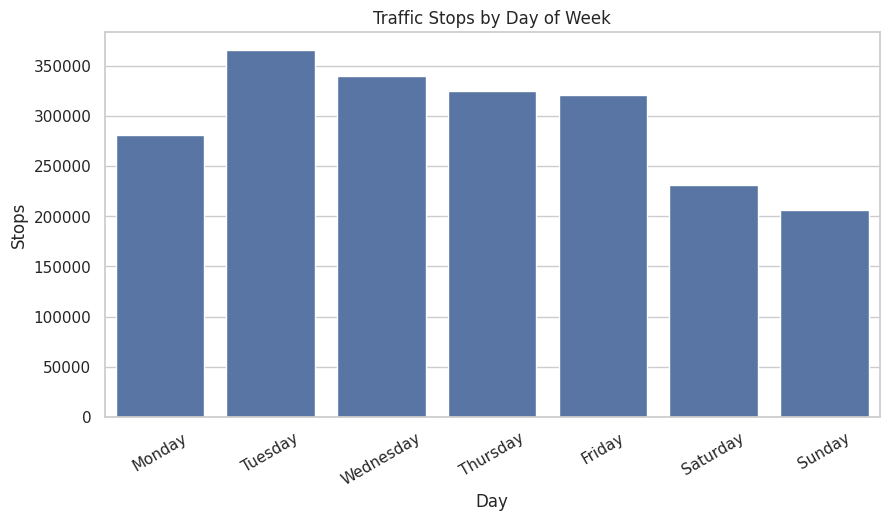

In [12]:
df['Weekday'] = df['Date Of Stop'].dt.day_name()

weekday_order = [
    'Monday','Tuesday','Wednesday',
    'Thursday','Friday','Saturday','Sunday'
]

weekday_counts = df['Weekday'].value_counts().reindex(weekday_order)

sns.barplot(
    x=weekday_counts.index,
    y=weekday_counts.values
)
plt.title("Traffic Stops by Day of Week")
plt.xlabel("Day")
plt.ylabel("Stops")
plt.xticks(rotation=30)
plt.show()


***Insights***

Traffic stops are highest on weekdays, peaking around Tuesday to Thursday.

Weekends (Saturday and Sunday) show significantly fewer traffic stops.

This suggests enforcement and traffic activity are strongly linked to regular workday travel patterns.

***Stops by District***

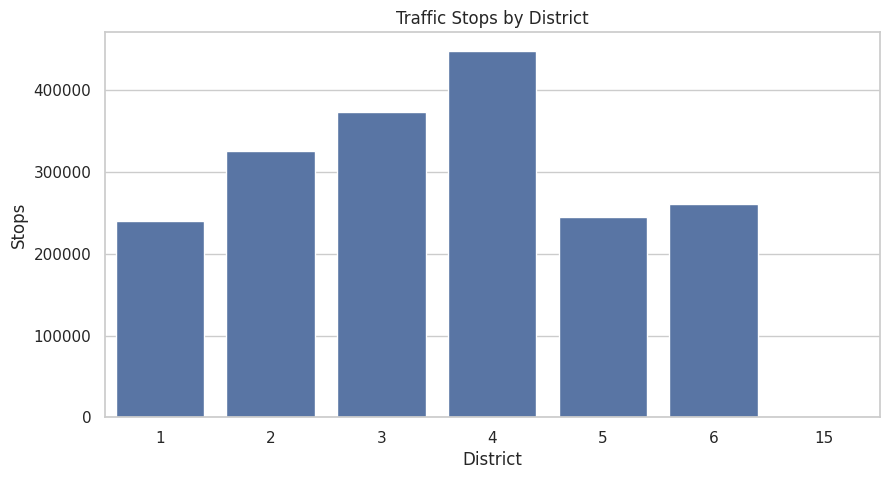

In [13]:
district_counts = df['District Number'].value_counts().sort_index()

sns.barplot(
    x=district_counts.index,
    y=district_counts.values
)
plt.title("Traffic Stops by District")
plt.xlabel("District")
plt.ylabel("Stops")
plt.show()


***Insights***

District 4 records the highest number of traffic stops, followed by Districts 3 and 2.

This indicates uneven enforcement or traffic density, with certain districts experiencing more monitoring and violations.


### ***Vehicle Types Involved***

In [14]:
vehicle_counts = df['VehicleType_Category'].value_counts()

fig = px.bar(
    x=vehicle_counts.index,
    y=vehicle_counts.values,
    title='Vehicle Types Involved in Traffic Stops'
)
fig.show()


### ***Violation Type vs Accident***

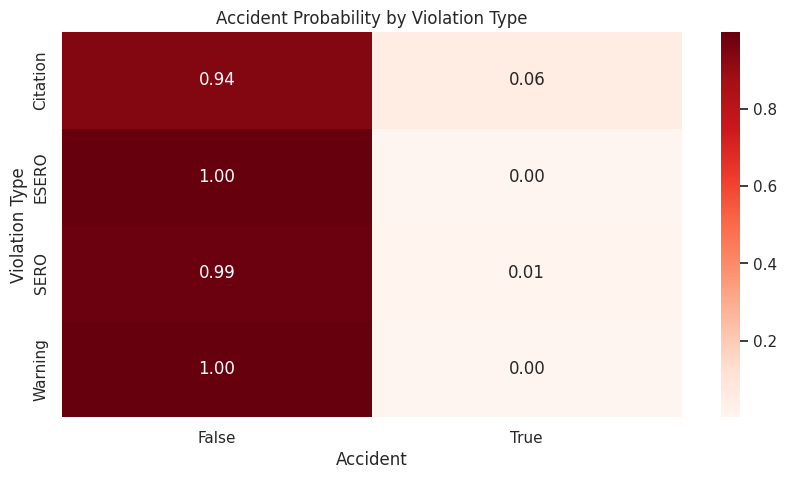

In [15]:
violation_accident = pd.crosstab(
    df['Violation Type'],
    df['Accident'],
    normalize='index'
)

sns.heatmap(
    violation_accident,
    annot=True,
    fmt=".2f",
    cmap="Reds"
)
plt.title("Accident Probability by Violation Type")
plt.show()


***Insights***

Across all violation types, the probability of an accident is very low, with most cases resulting in no accident.

Citations show a slightly higher accident likelihood compared to warnings and electronic enforcement, but overall risk remains minimal.

In [16]:
geo_df = df.dropna(subset=['Latitude', 'Longitude']).sample(100000, random_state=42)

fig = px.scatter_mapbox(
    geo_df,
    lat='Latitude',
    lon='Longitude',
    zoom=9,
    height=600,
    title='Geographic Distribution of Traffic Stops',
    opacity=0.4
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()


## ***Violation Type Distribution by Gender***

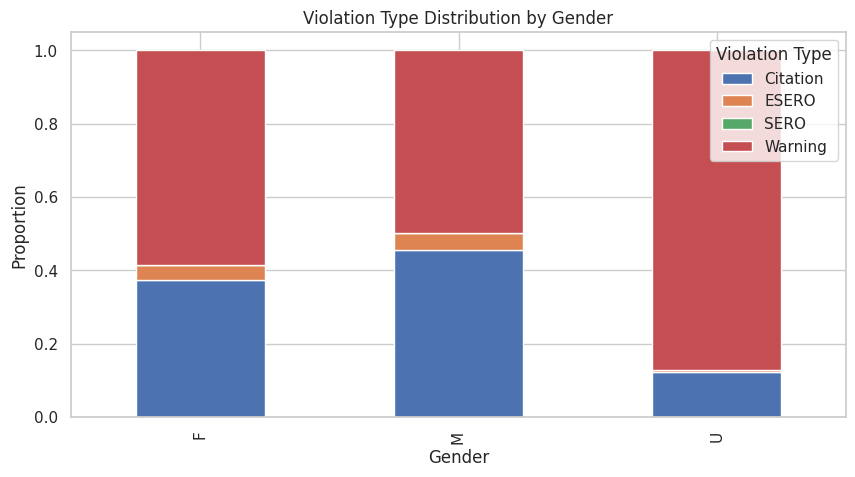

In [17]:
demo_violation = pd.crosstab(
    df['Gender'],
    df['Violation Type'],
    normalize='index'
)

demo_violation.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Violation Type Distribution by Gender')
plt.ylabel('Proportion')
plt.show()


***Insights***

Warnings dominate across all genders, especially for the unknown (U) category.

Males receive a higher proportion of citations compared to females, indicating stricter enforcement or riskier driving patterns among male drivers.

## ***Traffic Stops by Month***

In [18]:
df['Month'] = df['Date Of Stop'].dt.month_name()

month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

month_counts = df['Month'].value_counts().reindex(month_order)

fig = px.line(
    x=month_counts.index,
    y=month_counts.values,
    markers=True,
    title='Traffic Stops by Month'
)
fig.show()


***Insights***

Traffic stops peak around March–May, indicating higher enforcement or traffic activity in late spring.

Stops drop sharply in June and then remain relatively stable through the rest of the year, with a slight decline in December.